In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [3]:
df.shape

(100000, 9)

In [4]:
cat_col = df.select_dtypes(include=object).columns
cat_col

Index(['gender', 'smoking_history'], dtype='object')

In [6]:
for i in cat_col:
    print(df[i].value_counts())

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64


In [8]:
df.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

### This data is imbalanced

<Axes: xlabel='diabetes', ylabel='Count'>

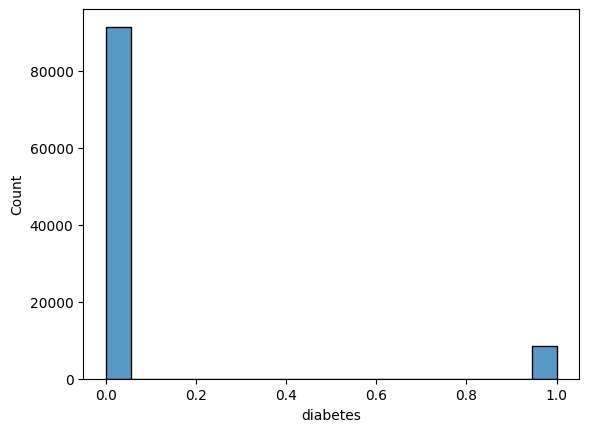

In [14]:
#plt.figure(figsize=(10,5))
sns.histplot(df['diabetes'])

In [15]:
X = df.drop(columns=['diabetes'],axis=1)
y = df['diabetes']

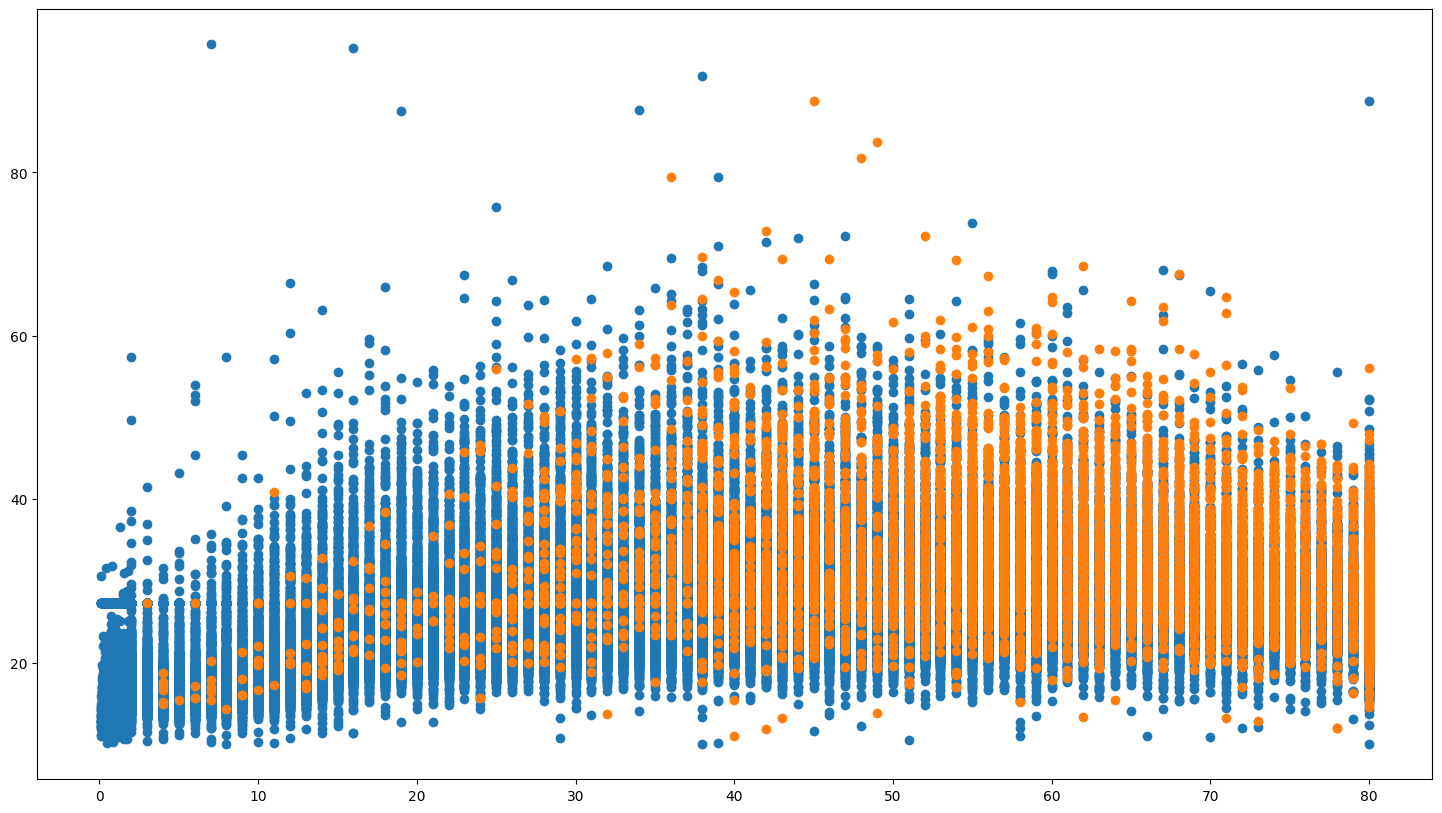

In [54]:

#ploting the imbalance dataset
import imblearn
from collections import Counter
counter = Counter(y)
plt.figure(figsize=(18,10))
for label,_ in counter.items():
    
    row_ix = np.where(y == label )[0]
    plt.scatter(X.loc[row_ix,'age'],X.loc[row_ix,'bmi'])


# Undersampling 1 - Random

After resampeling dataset shape Counter({0: 8500, 1: 8500})


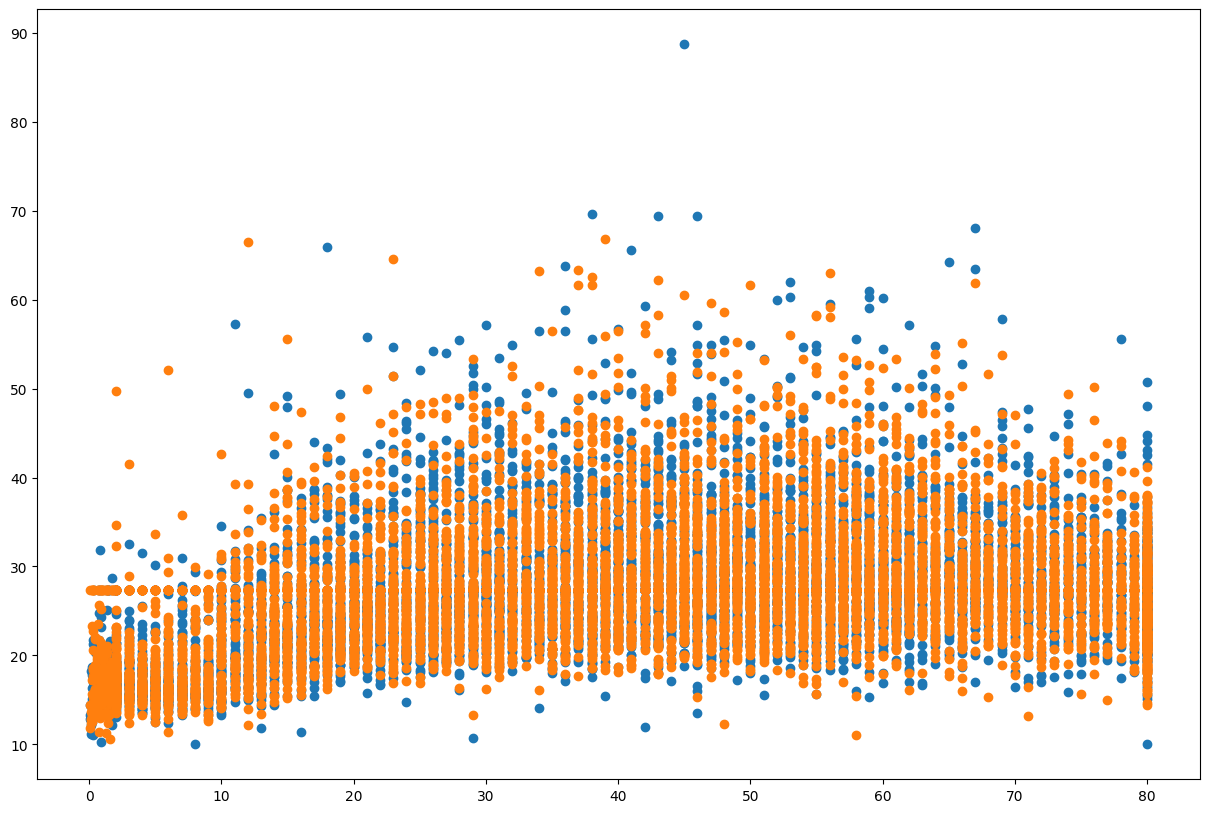

In [65]:
from imblearn.under_sampling import RandomUnderSampler,ClusterCentroids # we can use this as well this is similar to Kmean Cluster
from collections import Counter
rs = RandomUnderSampler(random_state=41)
X_res,y_res = rs.fit_resample(X,y)

print("After resampeling dataset shape %s" %Counter(y_res))
plt.figure(figsize=(15,10))
counter = Counter(y_res)
for label,_ in counter.items():
    idx = np.where(y_res == label)[0]
    plt.scatter(X.loc[idx,'age'],X.loc[idx,'bmi'])